## MVP Voting Data

* Dataset Overview: This dataset contains aggregated season-level statistics for NBA players who received MVP votes, including metrics like points, rebounds, assists, and efficiency percentages.

* Target Variable: The key outcome of interest is MVP_Won, indicating how many times a player won the MVP award — the primary focus of analysis.

* EDA Objective: The goal of this exploratory data analysis is to identify statistical patterns and performance indicators that are most associated with MVP success.

* Analysis Focus Areas: Includes distribution comparisons, missing value checks, correlation heatmaps, variance inflation testing, and MVP count visualizations.

* Key Insight Goal: Uncover which performance metrics most differentiate MVPs from non-MVPs, and explore the extent to which these stats explain MVP outcomes.

---
#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

---
#### Load Data

In [2]:
mvp = pd.read_csv("NBA_MVP_Voting_Data_cleaned_agg.csv")
mvp.head()

,Player,Count,MVP_Won,AVG_Minutes_Per_Game,AVG_Points_Per_Game,AVG_Total_Rebounds_Per_Game,AVG_Assists_Per_Game,AVG_Steals_Per_Game,AVG_blocks_Per_Game,AVG_Field_Goal_Percentage,AVG_3-Points_Field_Goal_Percentage,AVG_Free_Throw_Percentage,AVG_Win_Shares,AVG_Win_Shares_Per_48_Minutes
0,Jamal Mashburn,1,0,40.50,21.6000,6.1000,5.600,1.0000,0.2000,0.42200,0.3890,0.8480,9.000,0.13000
1,Ray Allen,2,0,38.75,22.9500,4.8000,4.150,1.3000,0.1500,0.45400,0.4045,0.8855,12.200,0.18950
2,Draymond Green,1,0,34.70,14.0000,9.5000,7.400,1.5000,1.4000,0.49000,0.3880,0.6960,11.100,0.19000
3,Russell Westbrook,8,1,35.30,25.0625,8.5375,9.375,1.7875,0.3375,0.43950,0.3100,0.7705,9.725,0.17675
4,LeBron James,20,4,37.80,26.9750,7.5150,7.410,1.5200,0.7450,0.50725,0.3472,0.7336,12.870,0.22375


---
#### Number of rows and columns

In [3]:
mvp.shape
print("Data set has", mvp.shape[0], "columns and", mvp.shape[1], "rows.")

Data set has 100 columns and 14 rows.


---
#### Data types and missing for each column

* All columns except one are complete — no missing values in key performance metrics like points, assists, or rebounds.

* Only "AVG_3-Points_Field_Goal_Percentage" has missing data (2 rows).

* This is minimal (2%), and can be handled by imputing with the mean or dropping the rows.

* Overall, the dataset is very clean and ready for analysis or modeling.

In [4]:
mvp_info = pd.DataFrame()
mvp_info["Data Type"] = mvp.dtypes
mvp_info["Missing No."] = mvp.isna().sum()
mvp_info

,Data Type,Missing No.
Player,object,0
Count,int64,0
MVP_Won,int64,0
AVG_Minutes_Per_Game,float64,0
AVG_Points_Per_Game,float64,0
AVG_Total_Rebounds_Per_Game,float64,0
AVG_Assists_Per_Game,float64,0
AVG_Steals_Per_Game,float64,0
AVG_blocks_Per_Game,float64,0
AVG_Field_Goal_Percentage,float64,0


---
#### Identify players with missing values for "AVG_3-Points_Field_Goal_Percentage" column

* Two players — Anthony Mason and PJ Brown — are missing values for "AVG_3-Points_Field_Goal_Percentage".
* Performing analysis on these individual player stats' shows that these players did not attempt three-point field goals for the seasons in question

In [5]:
mvp[mvp["AVG_3-Points_Field_Goal_Percentage"].isna()]["Player"]

7     Anthony Mason
66         PJ Brown
Name: Player, dtype: object

---
#### Fill missing values for "AVG_3-Points_Field_Goal_Percentage" column

* Players with "NaN" for "AVG_3-Points_Field_Goal_Percentage" will fill with "0" for reasons indicated above

In [6]:
mvp["AVG_3-Points_Field_Goal_Percentage"] = mvp["AVG_3-Points_Field_Goal_Percentage"].fillna(0)

mvp_info = pd.DataFrame()
mvp_info["Data Type"] = mvp.dtypes
mvp_info["Missing No."] = mvp.isna().sum()
mvp_info

,Data Type,Missing No.
Player,object,0
Count,int64,0
MVP_Won,int64,0
AVG_Minutes_Per_Game,float64,0
AVG_Points_Per_Game,float64,0
AVG_Total_Rebounds_Per_Game,float64,0
AVG_Assists_Per_Game,float64,0
AVG_Steals_Per_Game,float64,0
AVG_blocks_Per_Game,float64,0
AVG_Field_Goal_Percentage,float64,0


---
#### Exploratory Data Analysis

* The average player in the dataset appeared in MVP voting ~3.4 times and scored ~21.8 PPG, with a median of 22.35 PPG.
* Only a few players won MVPs, with most having 0 awards — the max is 4 MVPs and the 75th percentile is still 0.
* Players averaged around 35.7 minutes, 21.8 points, 7.1 rebounds, and 5.1 assists per game, reflecting well-rounded performance profiles.
* Shooting stats are solid overall: average FG% = 48%, 3P% = 30.6%, and FT% = 79.2%.

In [7]:
mvp.describe()

,Count,MVP_Won,AVG_Minutes_Per_Game,AVG_Points_Per_Game,AVG_Total_Rebounds_Per_Game,AVG_Assists_Per_Game,AVG_Steals_Per_Game,AVG_blocks_Per_Game,AVG_Field_Goal_Percentage,AVG_3-Points_Field_Goal_Percentage,AVG_Free_Throw_Percentage,AVG_Win_Shares,AVG_Win_Shares_Per_48_Minutes
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.440000,0.250000,35.704482,21.783792,7.092097,5.058292,1.287143,0.835954,0.480013,0.305711,0.792019,10.014593,0.181990
std,3.456278,0.672324,2.641859,4.973135,3.068566,2.434115,0.433598,0.765867,0.045853,0.123538,0.082260,2.334927,0.040039
min,1.000000,0.000000,29.200000,8.000000,2.700000,1.500000,0.350000,0.085714,0.399500,0.000000,0.454333,3.300000,0.075000
25%,1.000000,0.000000,34.075000,18.712500,4.637500,3.100000,0.966667,0.300000,0.450750,0.302850,0.758125,8.317262,0.153812
50%,2.000000,0.000000,35.575000,22.350000,6.338333,4.733333,1.188889,0.541667,0.476700,0.347900,0.804400,10.266667,0.180833
75%,5.000000,0.000000,37.368750,26.050000,9.783333,6.565909,1.535000,1.112500,0.504156,0.377375,0.845083,11.716667,0.213250
max,20.000000,4.000000,42.720000,31.400000,13.960000,11.450000,2.460000,3.233333,0.672000,0.500000,0.911727,14.385714,0.277000


---
#### Distribution of MVP Wins

* Most players (over 80%) have never won an MVP, indicating a highly imbalanced target variable.
* Only a small number of players have won MVP once (10%), with even fewer winning multiple times.
* Just one or two players in the dataset have won 3 or more MVPs, highlighting elite-level performance.
* The skewed distribution is important to consider when modeling — techniques like resampling or class weighting may be needed.

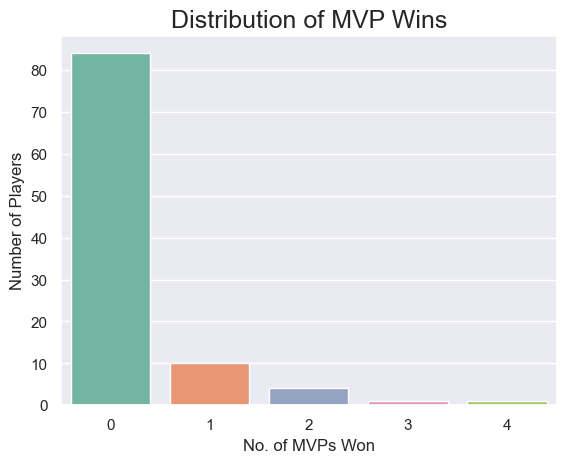

In [8]:
sns.countplot(data=mvp, x="MVP_Won", hue="MVP_Won", legend=False, palette="Set2")
plt.ylabel("Number of Players")
plt.xlabel("No. of MVPs Won")
plt.title("Distribution of MVP Wins", fontsize=18)
plt.show()

---
#### Players with more than one MVP win

* LeBron James leads the list with 4 MVP wins, the highest in the dataset.
* Other multiple-time MVP winners include Nikola Jokić (3) and Curry, Nash, Duncan, Giannis (2 each).
* Only a small elite group of players have won the MVP award more than once.
* This reinforces how rare consistent MVP-level performance is across seasons.

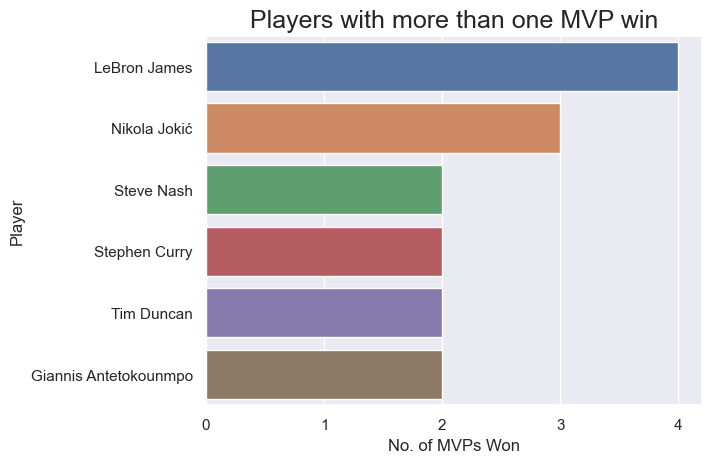

In [9]:
multiple_mvps = mvp[mvp["MVP_Won"] > 1][["Player", "MVP_Won"]].sort_values(by="MVP_Won", ascending=False)
multiple_mvps

sns.barplot(data=multiple_mvps, y="Player", x="MVP_Won", hue="Player", legend=False)
plt.xticks(np.arange(0, 5))
plt.xlabel("No. of MVPs Won")
plt.title("Players with more than one MVP win", fontsize=18)
plt.show()

---
#### MVP Winners Heatmap

* Field goal percentage shows strong positive correlation with both win shares (0.80) and win shares per 48 minutes (0.77), indicating that shooting efficiency is a key factor for MVP-level performance.

* Points per game positively correlate with steals (0.65), rebounds (0.65), and field goal percentage (0.58), suggesting that MVPs tend to be well-rounded high-impact players on both ends.

* Minutes per game has moderate correlation with win shares (0.35), but weaker relationships with other key metrics, hinting that MVP-level efficiency may matter more than pure playing time.

* Blocks and rebounds are highly correlated (0.74) among MVPs, reinforcing the interconnected nature of defensive dominance and inside presence.

* Free throw percentage and 3-point percentage have minimal correlation with win shares, suggesting scoring volume and overall shooting efficiency matter more than specific shooting splits.

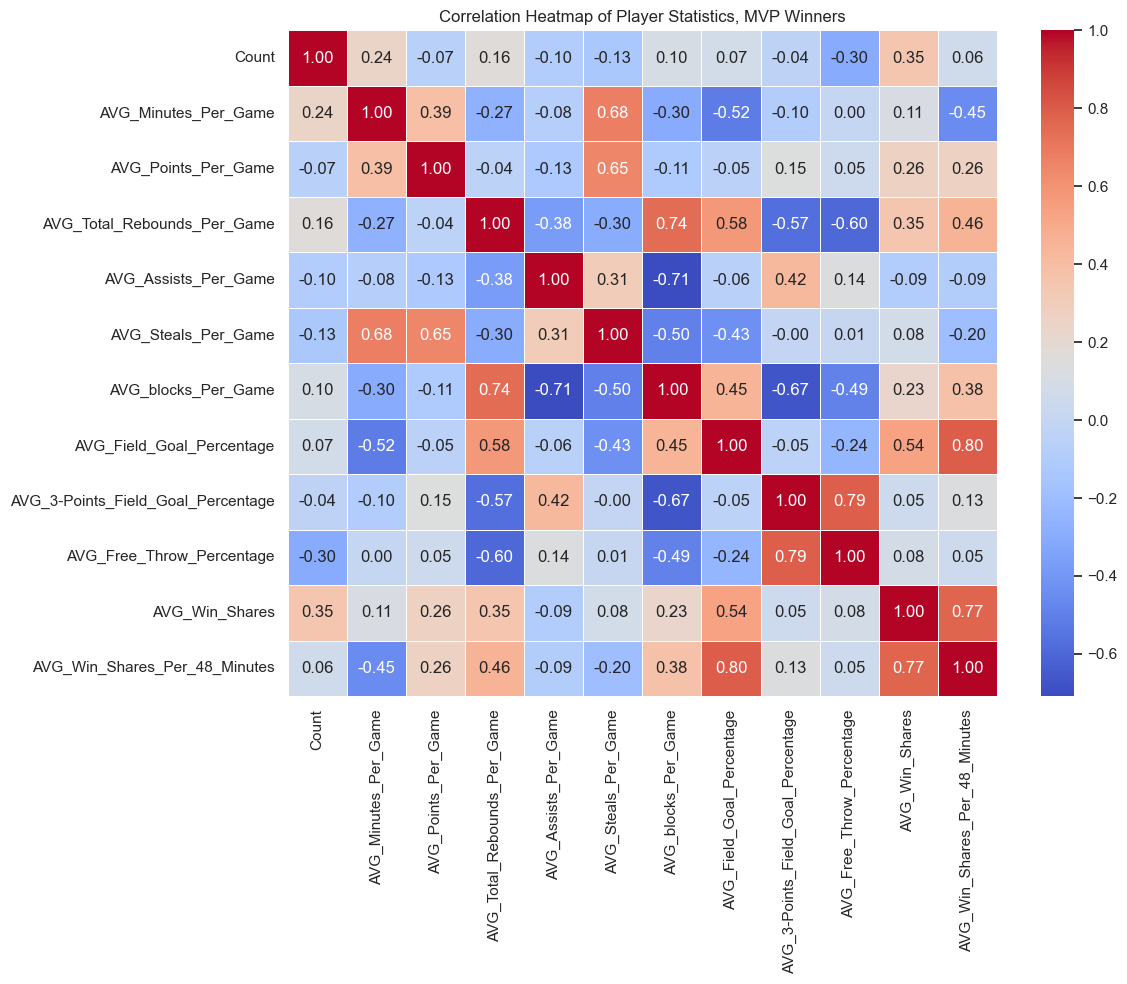

In [10]:
mvp_only = mvp[mvp["MVP_Won"] > 0].drop(columns=["MVP_Won"])

plt.figure(figsize=(12,10))
sns.heatmap(mvp_only.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Player Statistics, MVP Winners")
plt.tight_layout()
plt.show()

---
#### Non-MVP Winners Heatmap

* Win Shares and Win Shares per 48 Minutes remain strongly correlated (0.86), highlighting their shared contribution to team success metrics, even among non-MVPs.

* Field Goal Percentage shows moderate positive correlation with Win Shares (0.34) and WS/48 (0.49), suggesting that shooting efficiency contributes meaningfully to impact for non-MVP players as well.

* Traditional box score stats (points, rebounds, assists) show weaker correlations with Win Shares compared to MVPs, indicating that high counting stats don't necessarily translate to overall value for non-MVPs.

* Blocks and rebounds are moderately correlated (0.65), mirroring the defensive linkage seen in MVPs but to a lesser magnitude.

* Free throw percentage is mostly uncorrelated with other stats, including Win Shares, reinforcing the idea that it’s not a strong differentiator among non-MVP performers.

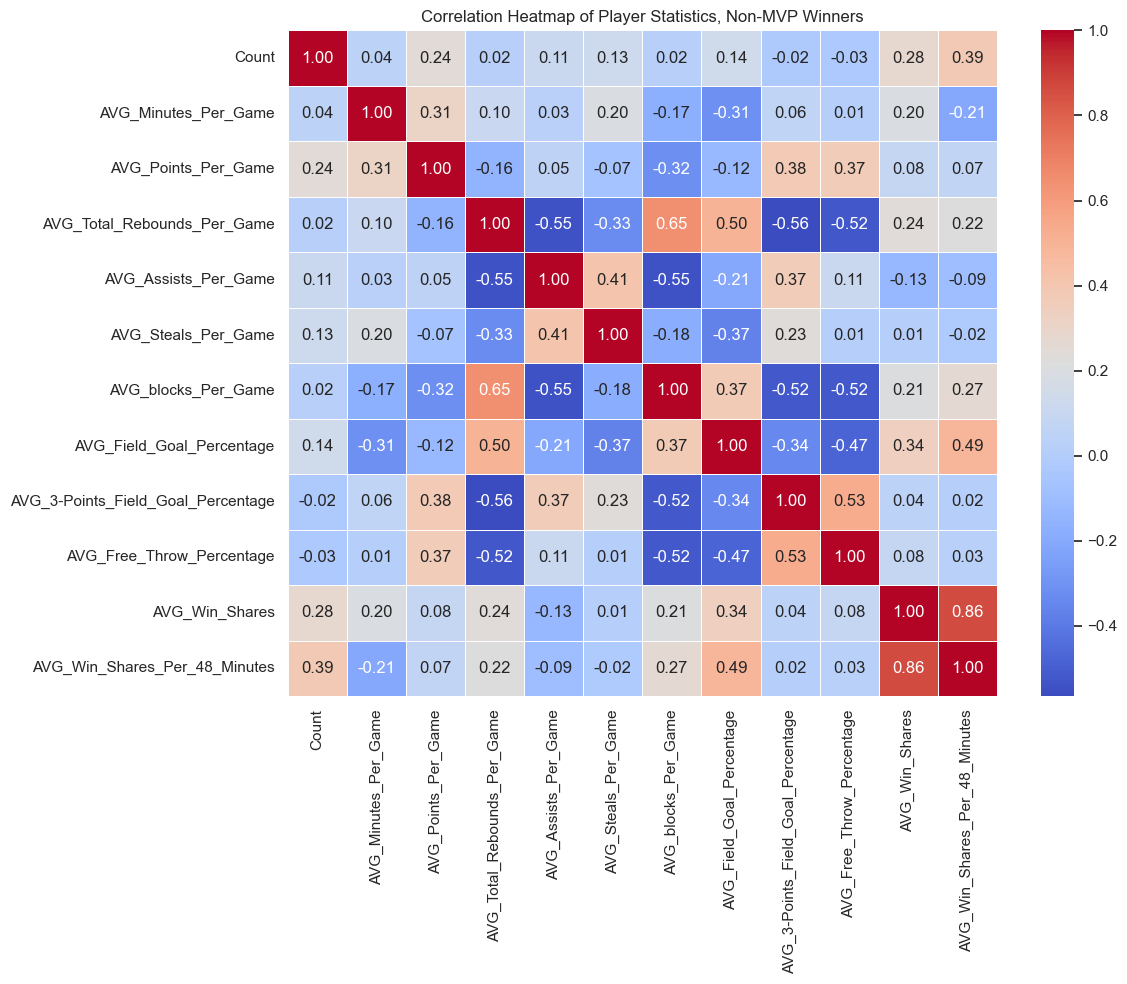

In [11]:
non_mvp = mvp[mvp["MVP_Won"] == 0].drop(columns=["MVP_Won"])

plt.figure(figsize=(12,10))
sns.heatmap(non_mvp.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Player Statistics, Non-MVP Winners")
plt.tight_layout()
plt.show()

---
#### MVP Winner Box Plots

* MVP winners typically average over 30 minutes and 25+ points per game, reinforcing the importance of consistent playing time and high scoring ability.

* Rebounds and assists show balanced medians around 10 and 6 respectively, suggesting MVPs often contribute in multiple facets beyond scoring.

* Shooting percentages (FG, 3PT, FT) display tight distributions with few outliers, indicating consistent offensive efficiency among MVPs.

* Win Shares and WS/48 show higher median values, reinforcing their role as strong cumulative and per-minute impact indicators for MVP selection.

* Outliers are limited and mostly on the higher end, reflecting that MVPs tend to sustain elite performance rather than having volatile or low-impact seasons.

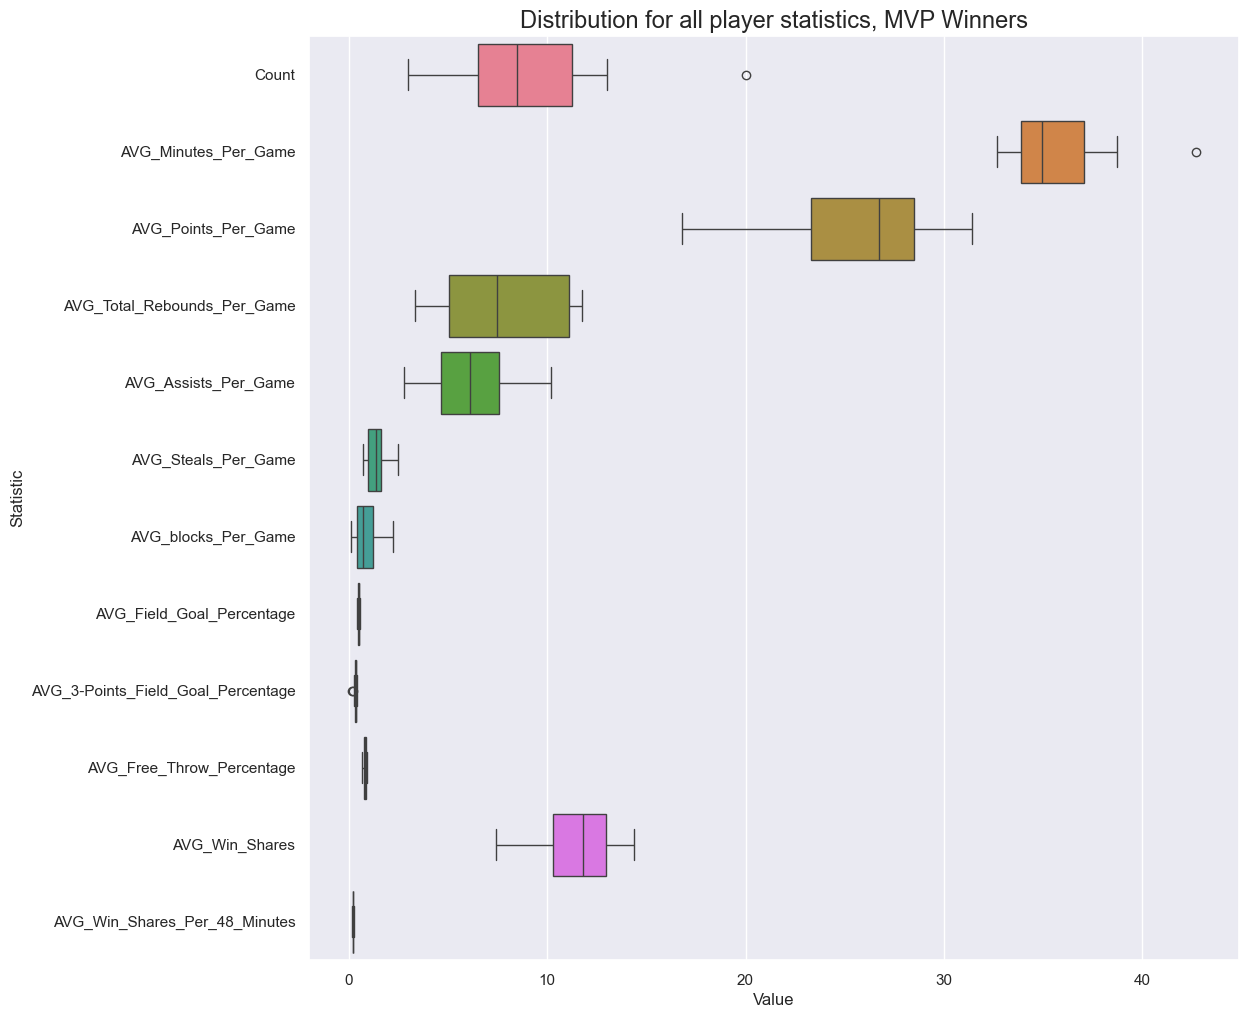

In [12]:
plt.figure(figsize=(12,12))
sns.boxplot(data=mvp_only, orient="h")
plt.xlabel("Value")
plt.ylabel("Statistic")
plt.title("Distribution for all player statistics, MVP Winners", fontsize=17)
plt.show()

---
#### Non-MVP Winner Box Plots

* Non-MVP players also average over 30 minutes per game, but their scoring tends to be lower, with a median around 20 PPG compared to MVPs.

* Rebounds and assists medians are slightly lower than MVPs, indicating less all-around impact on average.

* Field goal, 3-point, and free throw percentages are more varied, with wider distributions and more outliers, reflecting inconsistent shooting efficiency.

* Win Shares and WS/48 values have lower medians and a broader spread, suggesting less consistent value generation for their teams.

* Overall, non-MVPs exhibit greater variability in performance, with wider interquartile ranges and more statistical outliers in multiple categories.

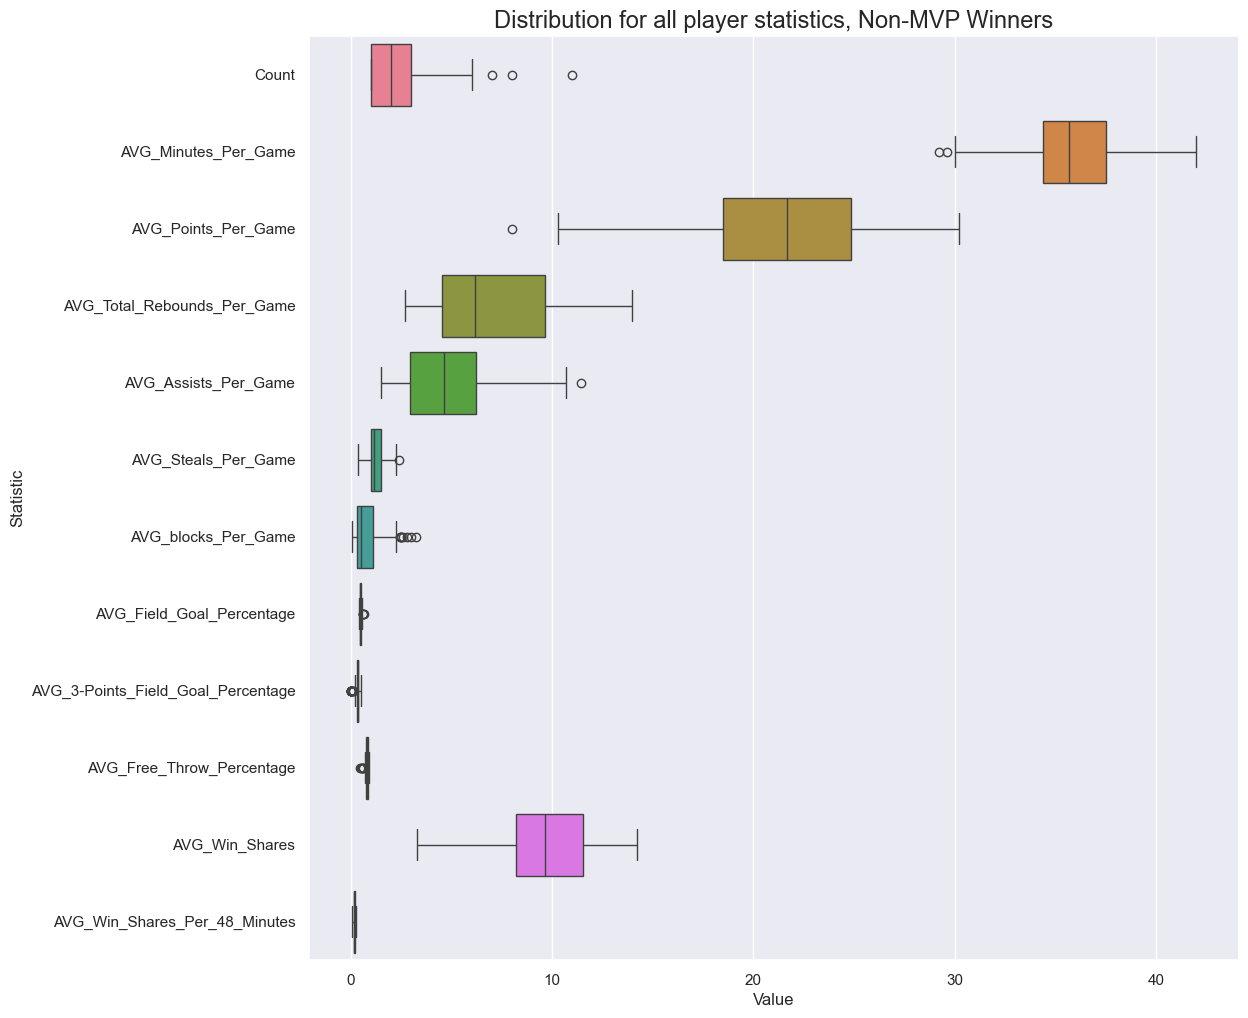

In [13]:
plt.figure(figsize=(12,12))
sns.boxplot(data=non_mvp, orient="h")
plt.xlabel("Value")
plt.ylabel("Statistic")
plt.title("Distribution for all player statistics, Non-MVP Winners", fontsize=17)
plt.show()

---
#### Multicollinearity Check

In [14]:
# Import VIF Library
from statsmodels.stats.outliers_influence import variance_inflation_factor

* Several features show very high VIF values (≫10), suggesting severe multicollinearity. Top culprits include AVG_Minutes_Per_Game (VIF ≈ 350) AVG_Win_Shares_Per_48_Minutes (VIF ≈ 260)

* AVG_Field_Goal_Percentage and AVG_Win_Shares (VIFs > 150)

* MVP_Won (target) and Count (number of MVP voting seasons) have relatively low VIFs (< 6), suggesting they can be used reliably as independent features.

* Will consider dimensionality reduction techniques (e.g., PCA) or carefully removing highly collinear features based on business relevance to improve model interpretability.

In [15]:
# Run VIF Test
start_index = mvp.columns.get_loc("Count")
cols_to_test = mvp.iloc[:, start_index:]

vif = pd.DataFrame()
vif["features"] = cols_to_test.columns
vif["VIF"] = [variance_inflation_factor(cols_to_test.values, i) for i in range(cols_to_test.shape[1])]

vif.sort_values(by="VIF", ascending=True)

,features,VIF
1,MVP_Won,2.921578
7,AVG_blocks_Per_Game,5.519808
0,Count,5.638133
5,AVG_Assists_Per_Game,11.222484
9,AVG_3-Points_Field_Goal_Percentage,14.010026
6,AVG_Steals_Per_Game,16.656755
4,AVG_Total_Rebounds_Per_Game,19.201435
3,AVG_Points_Per_Game,35.759524
10,AVG_Free_Throw_Percentage,140.263792
11,AVG_Win_Shares,157.372752


In [16]:
# Remove VIF Iteratively

def calculate_vif(df, thresh=10.0):
    variables = df.columns.tolist()
    dropped = True
    while dropped:
        dropped = False
        vif_data = pd.DataFrame()
        vif_data["Feature"] = variables
        vif_data["VIF"] = [variance_inflation_factor(df[variables].values, i) for i in range(len(variables))]

        max_vif = vif_data["VIF"].max()
        if max_vif > thresh:
            drop_feature = vif_data.sort_values("VIF", ascending=False)["Feature"].iloc[0]
            print(f"Dropping '{drop_feature}' with VIF: {max_vif:.2f}")
            variables.remove(drop_feature)
            dropped = True

# Usage
cleaned_df = calculate_vif(cols_to_test, thresh=10)

Dropping 'AVG_Minutes_Per_Game' with VIF: 350.48
Dropping 'AVG_Win_Shares_Per_48_Minutes' with VIF: 116.14
Dropping 'AVG_Field_Goal_Percentage' with VIF: 98.34
Dropping 'AVG_Free_Throw_Percentage' with VIF: 53.00
Dropping 'AVG_Win_Shares' with VIF: 25.00
Dropping 'AVG_Points_Per_Game' with VIF: 21.43
Dropping 'AVG_Steals_Per_Game' with VIF: 10.56


---
#### Export data for preprocessing

In [17]:
data_out = mvp.to_csv("01_exploratory_data_analysis.csv", index=False)